In [0]:
# !git clone https://github.com/muxspace/facial_expressions.git
# !rm -rf facial_expressions/R facial_expressions/python facial_expressions/LICENSE facial_expressions/README.md facial_expressions/.git facial_expressions/.gitignore

In [0]:
from fastai.vision import *

In [8]:
path = Path('facial_expressions')
path.ls()

[PosixPath('facial_expressions/images'),
 PosixPath('facial_expressions/test'),
 PosixPath('facial_expressions/data')]

In [10]:
(path/'data').ls()

[PosixPath('facial_expressions/data/legend.csv'),
 PosixPath('facial_expressions/data/500_picts_satz.csv')]

In [11]:
label_df = pd.read_csv(path/'data/legend.csv')
label_df.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [31]:
satz_df = pd.read_csv(path/'data/500_picts_satz.csv', header=None, names=["user.id", "image", "emotion"])
satz_df.head()

,user.id,image,emotion
0,906,Sourav_Ganguly_0003.jpg,fear
1,906,Sourav_Ganguly_0004.jpg,happiness
2,906,Sourav_Ganguly_0005.jpg,neutral
3,906,Spencer_Abraham_0001.jpg,anger
4,906,Spencer_Abraham_0003.jpg,anger


In [32]:
label_df.shape, satz_df.shape

((13690, 3), (500, 3))

In [18]:
!ls {path}/'images' | grep Sourav_Ganguly_0003.jpg 

Sourav_Ganguly_0003.jpg


In [19]:
!ls {path}/'images' | grep facial-expressions_2868582k.jpg	

facial-expressions_2868582k.jpg


In [0]:
df = label_df.append(satz_df)

In [34]:
df.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [37]:
df.tail()

,user.id,image,emotion
495,906,Tim_Pawlenty_0001.jpg,neutral
496,906,Tim_Robbins_0001.jpg,neutral
497,906,Tim_Robbins_0002.jpg,neutral
498,906,Tim_Robbins_0003.jpg,neutral
499,906,Tim_Robbins_0004.jpg,happiness


In [36]:
df.shape

(14190, 3)

In [38]:
files = get_image_files(path/'images')
print(len(files))
files[:4]

13718


[PosixPath('facial_expressions/images/Nicanor_Duarte_Frutos_0006.jpg'),
 PosixPath('facial_expressions/images/Paul_Shanley_0001.jpg'),
 PosixPath('facial_expressions/images/Lou_Piniella_0003.jpg'),
 PosixPath('facial_expressions/images/Halle_Berry_0016.jpg')]

In [48]:
df.drop_duplicates(subset=['image'], keep=False).shape

(13176, 3)

In [42]:
df.columns

Index(['user.id', 'image', 'emotion'], dtype='object')

In [0]:
sz=224
bs=64

In [0]:
src = (ImageList.from_df(label_df, path, cols='image', folder='images')
       .split_by_rand_pct(0.2)
       .label_from_df(cols='emotion'))

In [0]:
data = (src.transform(get_transforms(), size=sz)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

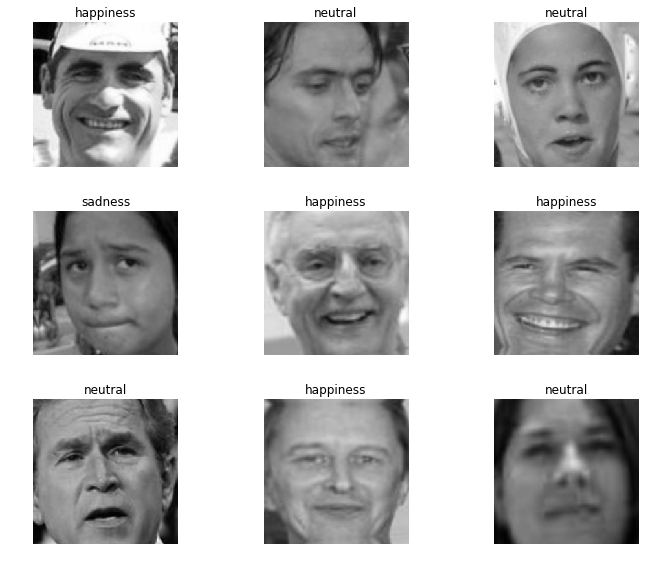

In [65]:
data.show_batch(rows=3, figsize=(10, 8))

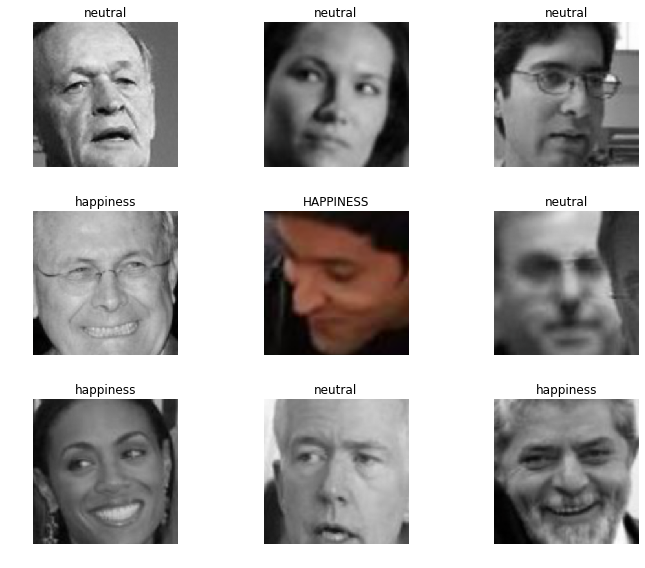

In [66]:
data.show_batch(rows=3, figsize=(10, 8), ds_type=DatasetType.Valid)

In [67]:
data.classes, data.c

(['ANGER',
  'DISGUST',
  'FEAR',
  'HAPPINESS',
  'NEUTRAL',
  'SADNESS',
  'SURPRISE',
  'anger',
  'contempt',
  'disgust',
  'fear',
  'happiness',
  'neutral',
  'sadness',
  'surprise'],
 15)